<a href="https://colab.research.google.com/github/sakhilesk/Sales-Analysis/blob/main/Sales_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
sales_data = pd.read_csv('/content/sales_data.csv', encoding='latin-1')

In [6]:
sales_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [7]:
sales_by_year = sales_data.groupby('YEAR_ID')['SALES'].sum().reset_index()

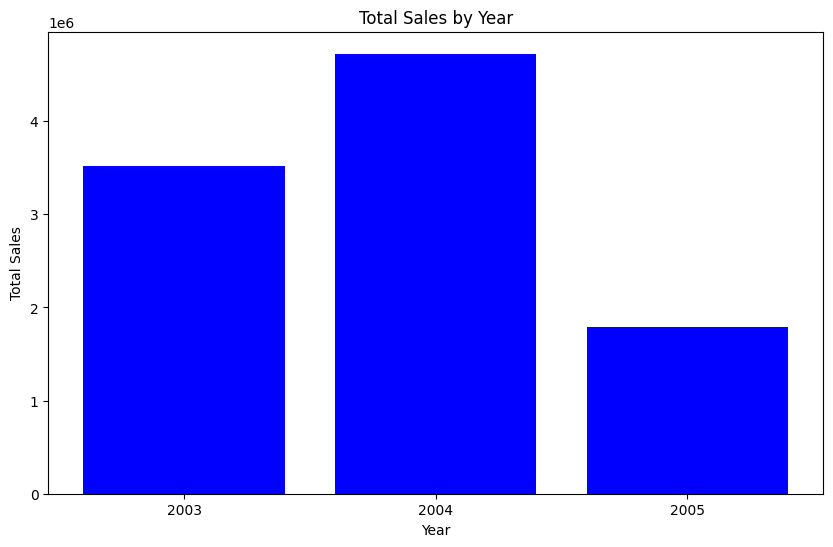

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(sales_by_year['YEAR_ID'], sales_by_year['SALES'], color='blue')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(sales_by_year['YEAR_ID'])
plt.show()

In [11]:
orders_per_year = sales_data.groupby('YEAR_ID')['ORDERNUMBER'].nunique().reset_index()
total_sales_per_year = sales_data.groupby('YEAR_ID')['SALES'].sum().reset_index()

In [12]:
aov_data = pd.merge(orders_per_year, total_sales_per_year, on='YEAR_ID')
aov_data['AOV'] = aov_data['SALES'] / aov_data['ORDERNUMBER']

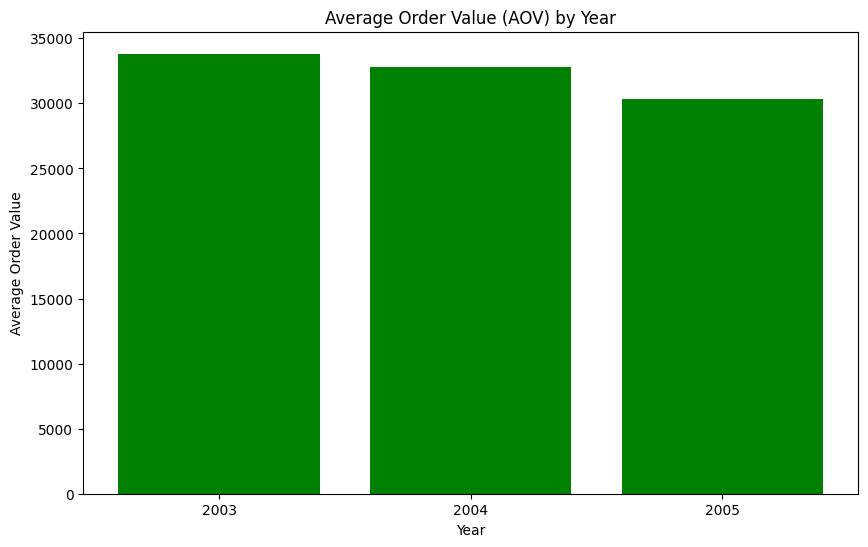

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(aov_data['YEAR_ID'], aov_data['AOV'], color='green')
plt.title('Average Order Value (AOV) by Year')
plt.xlabel('Year')
plt.ylabel('Average Order Value')
plt.xticks(aov_data['YEAR_ID'])
plt.show()

In [14]:
sales_by_country = sales_data.groupby('COUNTRY')['SALES'].sum().reset_index()

In [15]:
sales_by_country = sales_by_country.sort_values(by='SALES', ascending=False)

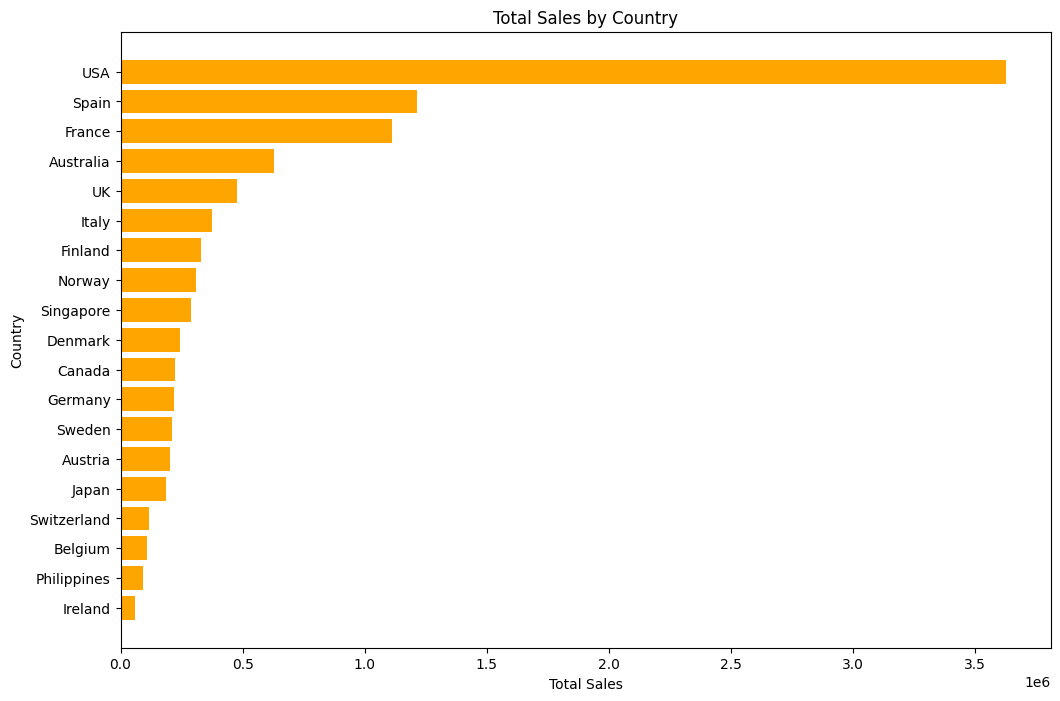

In [16]:
plt.figure(figsize=(12, 8))
plt.barh(sales_by_country['COUNTRY'], sales_by_country['SALES'], color='orange')
plt.title('Total Sales by Country')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.show()

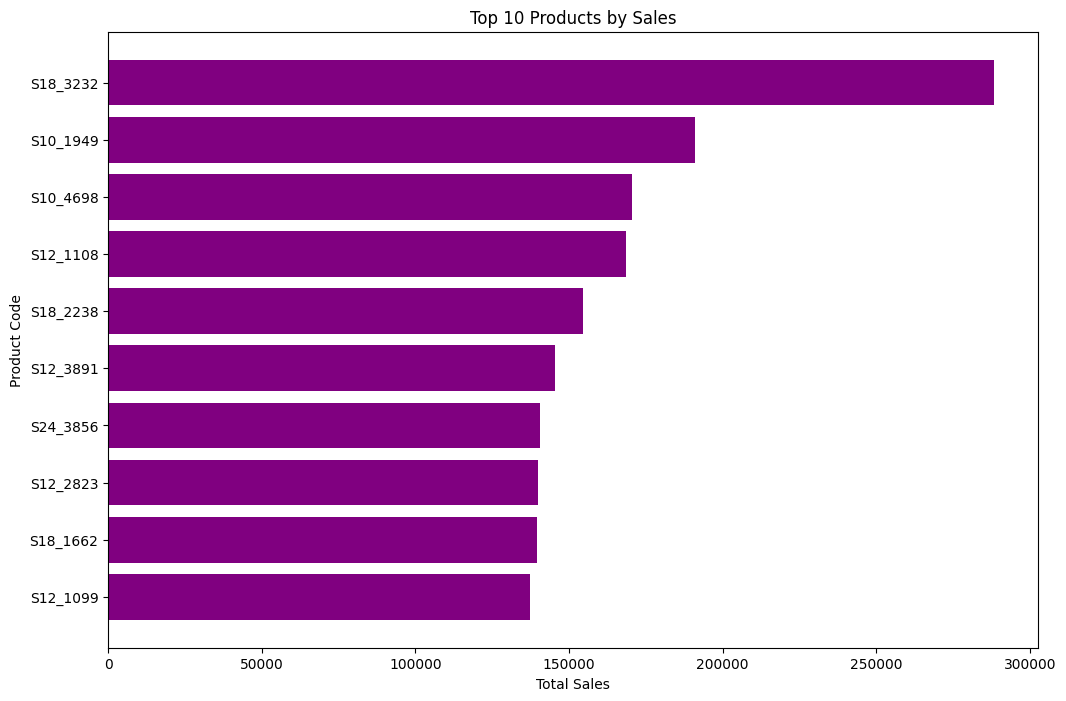

In [22]:
if 'PRODUCTCODE' in sales_data.columns:
  sales_by_product = sales_data.groupby('PRODUCTCODE')['SALES'].sum().reset_index()
  plt.figure(figsize=(12, 8))
  sales_by_product = sales_by_product.sort_values(by='SALES',ascending=False)
  plt.barh(sales_by_product['PRODUCTCODE'].head(10), sales_by_product['SALES'].head(10), color='purple')
  plt.title('Top 10 Products by Sales')
  plt.xlabel('Total Sales')
  plt.ylabel('Product Code')
  plt.gca().invert_yaxis()
  plt.show()
else:
  product_analysis_error = "Product code information not available in the dataset."
try:
  product_analysis_error
except NameError:
  pass